In [1]:
pip install scikit-learn

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetching Ethereum stock data
ETH_stock = yf.download("ETH-USD", start='2014-01-01', end='2024-12-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
print (ETH_stock)

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2014-09-17    457.334015    468.174011    452.421997    465.864014   
2014-09-18    424.440002    456.859985    413.104004    456.859985   
2014-09-19    394.795990    427.834991    384.532013    424.102997   
2014-09-20    408.903992    423.295990    389.882996    394.673004   
2014-09-21    398.821014    412.425995    393.181000    408.084991   
...                  ...           ...           ...           ...   
2024-11-26  91985.320312  94991.750000  90770.812500  93087.281250   
2024-11-27  95962.531250  97361.179688  91778.664062  91978.140625   
2024-11-28  95652.468750  96650.203125  94677.351562  95954.945312   
2024-11-29  97461.523438  98693.171875  95407.882812  95653.953125   
2024-11-30  96449.054688  97499.343750  96144.218750  97468.812500   

Price            Vo

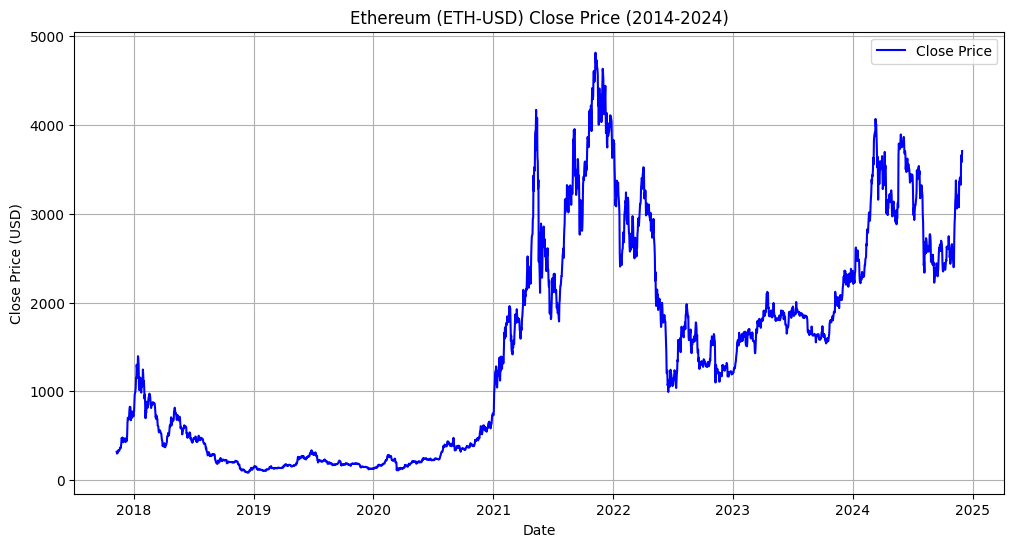

In [18]:
# Plot the 'Close' price
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(ETH_stock['Close'], label='Close Price', color='blue')
plt.title('Ethereum (ETH-USD) Close Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()

In [19]:
import yfinance as yf

# Fetch Ethereum stock data
ETH_stock1 = yf.download("ETH-USD", start='2014-01-01', end='2024-12-01')

# Convert all columns of the DataFrame to a NumPy array
array_all_columns = ETH_stock.to_numpy()

print("Array with all columns:")
print(array_all_columns)
print("\nShape of the array:", array_all_columns.shape)

[*********************100%***********************]  1 of 1 completed

Array with all columns:
[[3.20884003e+02 3.29451996e+02 3.07056000e+02 3.08644989e+02
  8.93249984e+08]
 [2.99252991e+02 3.24717987e+02 2.94541992e+02 3.20670990e+02
  8.85985984e+08]
 [3.14681000e+02 3.19453003e+02 2.98191986e+02 2.98585999e+02
  8.42300992e+08]
 ...
 [3.57981152e+03 3.66487817e+03 3.53187061e+03 3.65660962e+03
  3.23627243e+10]
 [3.59349438e+03 3.64726440e+03 3.53844678e+03 3.57991064e+03
  2.76226295e+10]
 [3.70570532e+03 3.73993481e+03 3.57225415e+03 3.59359814e+03
  3.06708674e+10]]

Shape of the array: (2579, 5)


In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
df = pd.DataFrame(ETH_stock)

In [22]:
# Step 1: Create feature set (X) by dropping the 'Close' column
X = df.drop(columns=['Close'])

In [23]:
# Step 2: Create target variable (y) as the 'Close' column
y = df['Close']

In [24]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 4: Initialize and fit the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Step 6: Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1161416.2412843166


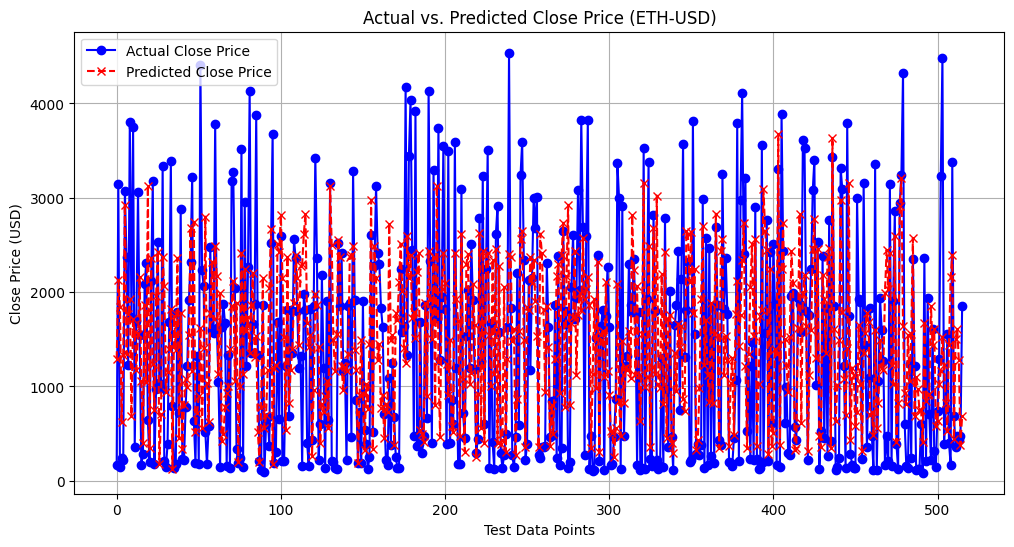

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue', marker='o', linestyle='-')
plt.plot(y_pred, label='Predicted Close Price', color='red', marker='x', linestyle='--')
plt.title('Actual vs. Predicted Close Price (ETH-USD)')
plt.xlabel('Test Data Points')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


[*********************100%***********************]  1 of 1 completed


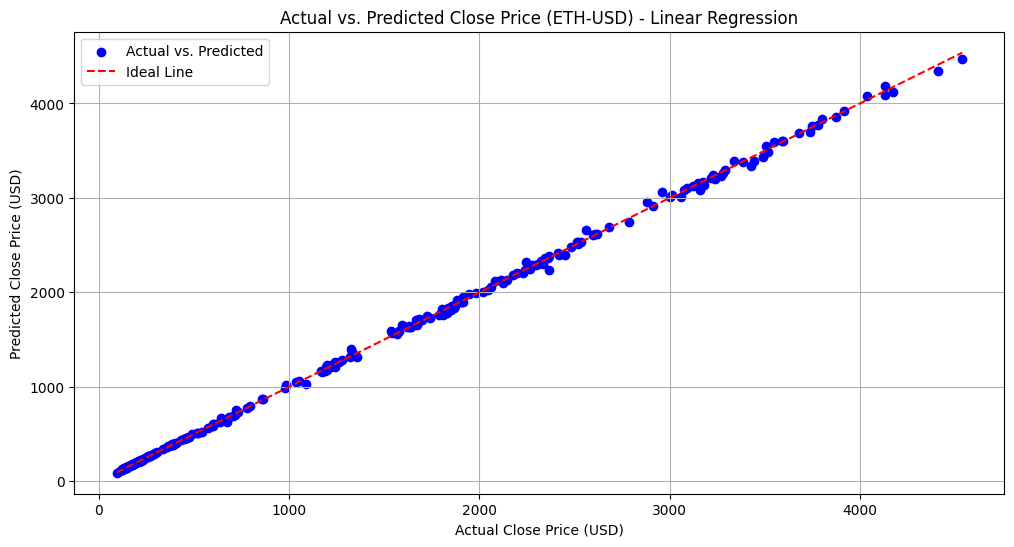

Mean Squared Error: 683.6019825753663


In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetch Ethereum stock data
ETH_stock = yf.download("ETH-USD", start='2014-01-01', end='2024-12-01')

# Prepare the data
# Features: All columns except 'Close'
X = ETH_stock.drop(columns=['Close'])

# Target: 'Close' column
y = ETH_stock['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs. Predicted Close Price (ETH-USD) - Linear Regression')
plt.xlabel('Actual Close Price (USD)')
plt.ylabel('Predicted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")